# Chapter 4: Machine Learning state of the art
## Figure 4.25
Silhouette analysis.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)

# Run spectral clustering on the digits data

In [62]:
from sklearn import cluster
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import datasets

# Import some data to play with
data = datasets.load_digits()
X = data.data
y = data.target

# shuffle and split training and test sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=.80, random_state=0)
idx_train, idx_test = next(sss.split(X, y))
X_train, X_test, y_train, y_test = X[idx_train, :], X[idx_test, :], y[idx_train], y[idx_test]

print('{} x {}'.format(*X_train.shape))

359 x 64


# Make silhouette plot
The function `silhouette(data_in, labels, model)` is a lite version of [`adenine.core.plotting.silhouette`](https://github.com/slipguru/adenine/blob/master/adenine/core/plotting.py).

In [63]:
from sklearn import metrics
    
def silhouette(data_in, labels, model, filename):
    """Make a silhouette plot.
    
    Parameters
    -----------
    data_in : array of float, shape : (n_samples, n_dimensions)
        The low space embedding estimated by the dimensionality reduction and
        manifold learning algorithm.
    labels : array of float, shape : n_samples
        The label vector. It can contain true or estimated labels.
    model : sklearn or sklearn-like object
        An instance of the class that evaluates a step.
    """
    # Create a subplot with 1 row and 2 columns
    fig = plt.figure(dpi=300)
    ax1 = fig.add_subplot(111)
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters.
    n_clusters = np.unique(labels).shape[0]
    ax1.set_ylim([0, len(data_in) + (n_clusters + 1) * 10])

    # Set the metric to euclidean.
    metric = 'euclidean'
    
    # Compute silhouette values
    sample_silhouette_values = metrics.silhouette_samples(data_in, labels, metric=metric)
    sil = np.mean(sample_silhouette_values)
        
    y_lower = 10
    for i, label in enumerate(np.unique(labels)):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == label]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = lambda i: 'C'+str(i%10) # return something in ['C0' - 'C9']
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color(i), edgecolor=color(i), alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(label))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=sil, color="indianred", linestyle="--")
    ax1.set_yticks([])
    # ax1.set_xticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title("Silhouette analysis. "
              "{0} clusters for {2} samples, average score {1:.4f}".format(n_clusters, sil, data_in.shape[0]))
    
    plt.tight_layout()
    plt.savefig(filename)

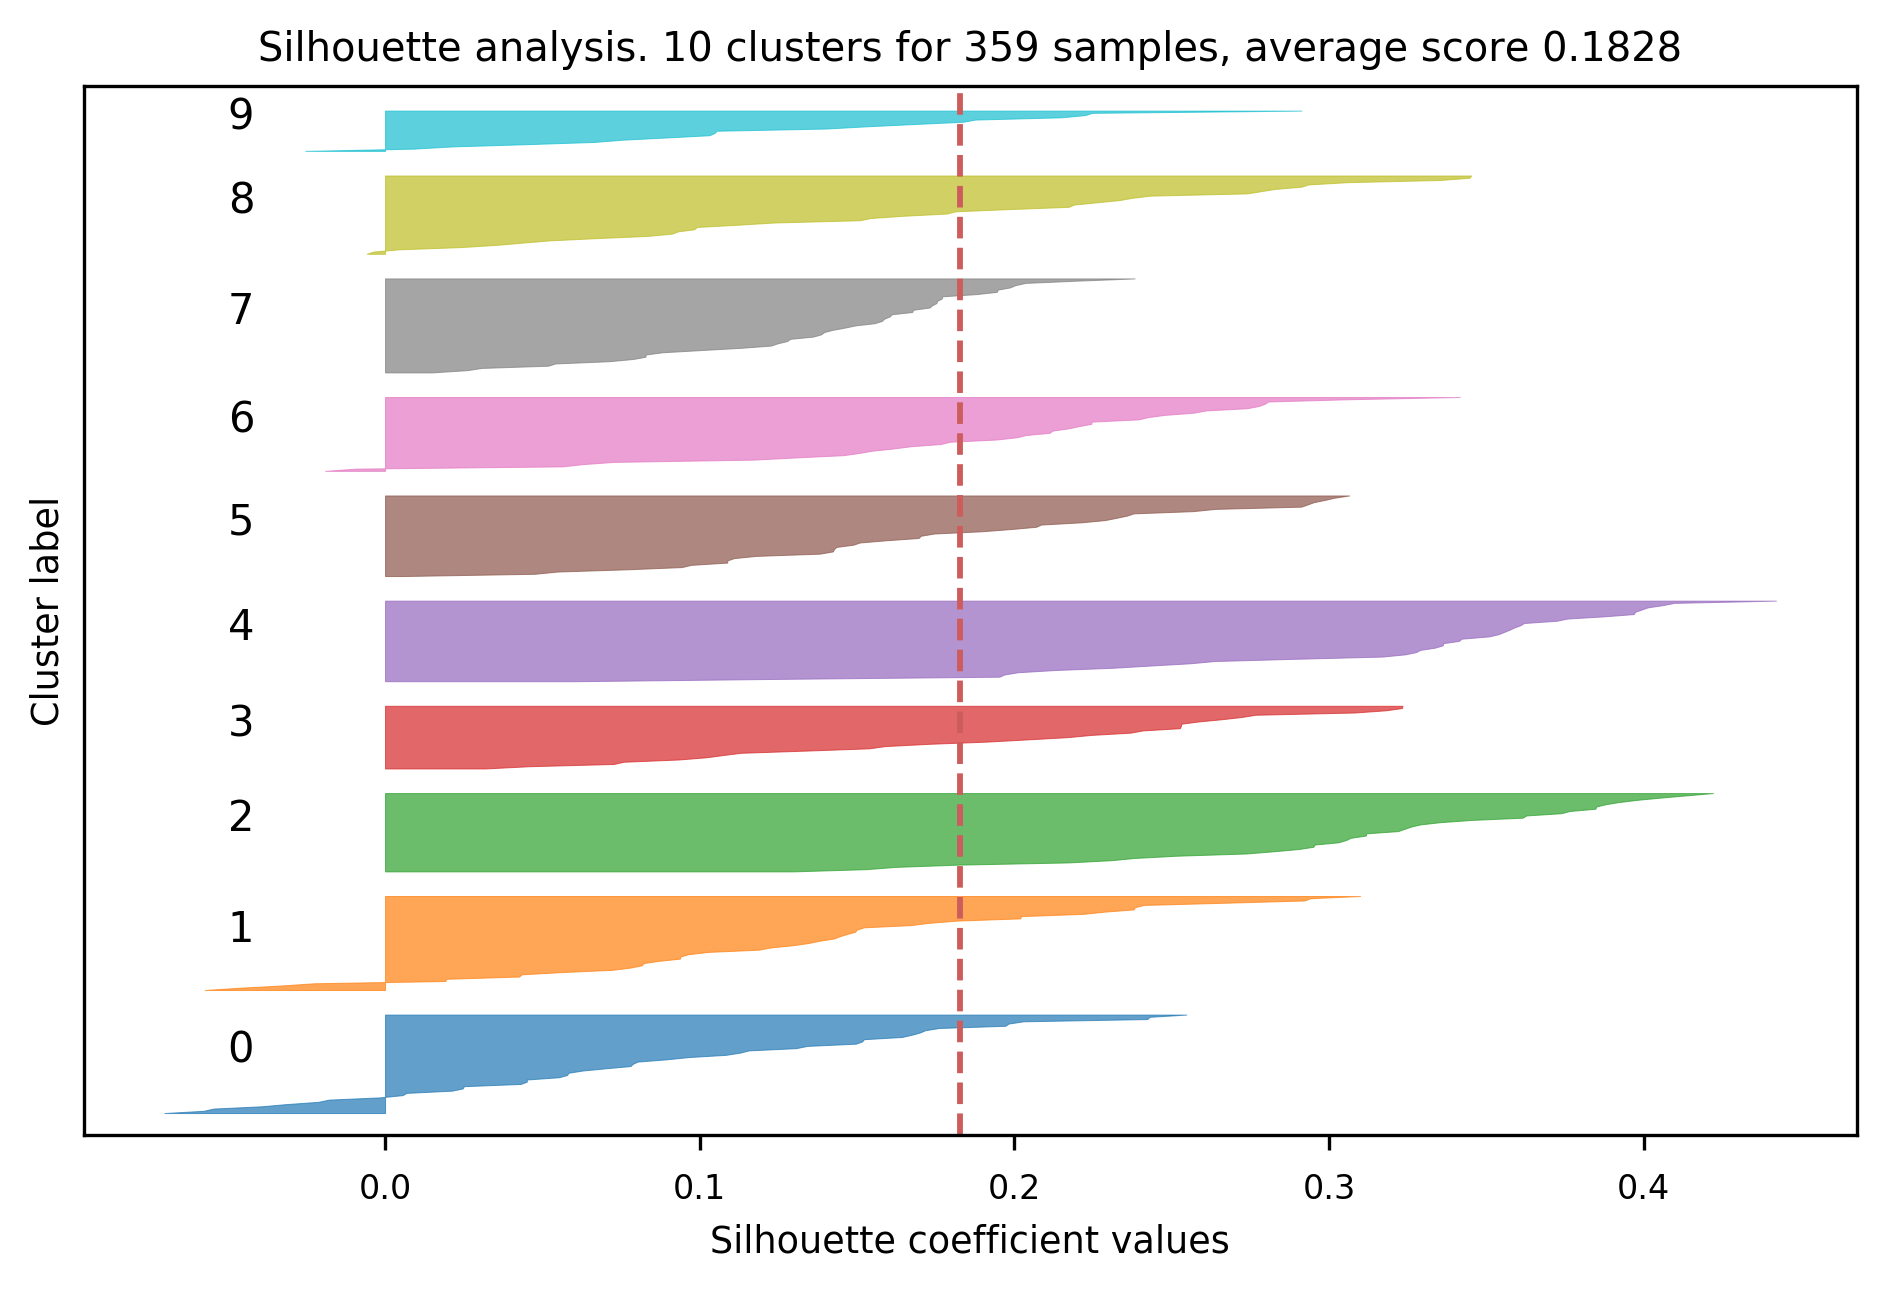

In [65]:
# run clustering
model = cluster.KMeans(n_clusters=10)

silhouette(X_train, model.fit_predict(X_train), model, '../images/silhouette.png')